# 1. Getting Started

---

Getting started with image processing is straightforward. There's three classes of operations in `phenotypic`: `ImageOperation`, `MeasureFeature`, and `ImagePipeline`.

- `ImageOperation`(s): processes that operate on the data of an image in preparation for feature extraction with `MeasureFeature`.
- `MeasureFeature`(s) extract measurements from the objects within the image based on the pixel values.
- `ImagePipeline`(s) are a collection of operations and measurements compiled into a single class for convenience.

To get started with `phenotypic`, it's fastest to start by using one of the pipelines in `phenotypic.prefab`. Below we use `phenotypic.prefab.HeavyWatershedPipeline`, which was used with hand scanner images of *Kluveromyces Marxianus*.


In [5]:
import phenotypic as pht

filepaths = [x for x in
             pht.data.yield_sample_dataset(mode='filepath')]
print(filepaths[-2])  # lets show the filepath we'll be using

../../../../../src/phenotypic/data/PhenoTypicSampleSubset/6_1S_8.jpg


In [6]:
# We're gonna import the last image in the dataset, lets make an image with a grid in 96 array format
# Accepted filepaths are jpegs, tiffs, pngs, and RAW format files
# These images are jpegs so we set a bit depth of 8.
image = pht.GridImage.imread(filepaths[-2], nrows=8, ncols=12, bit_depth=8)

## Processing your first image

---
Here we're gonna import the last image in the dataset, since its from the last timepoint and should have reasonable growth. Accepted file formats are jpegs, tiffs, pngs, and RAW files.

**Important things to note:**
 - `bit_depth` will have an important role in memory usage and accuracy. For jpegs, this will always be 8. For other image formats, consult your camera documentation for information. You may also find this information in your image metadata, depending on the format. PhenoTypic supports bit depths of 8 and 16. If not provided, PhenoTypic will try to guess this information from the imported image data.

  Metadata_FileSuffix  Metadata_BitDepth Metadata_ImageType  \
0                .jpg                  8          GridImage   
1                .jpg                  8          GridImage   
2                .jpg                  8          GridImage   
3                .jpg                  8          GridImage   
4                .jpg                  8          GridImage   

  Metadata_ImageName  ObjectLabel  Bbox_CenterRR  Bbox_CenterCC  Bbox_MinRR  \
0             6_1S_8            1     210.476174     659.168300         179   
1             6_1S_8            2     217.124467     336.335607         183   
2             6_1S_8            3     221.093354     981.827532         184   
3             6_1S_8            4     217.560426     509.190044         185   
4             6_1S_8            5     218.448008    1626.370462         187   

   Bbox_MinCC  Bbox_MaxRR  ...  ColorHSV_BrightnessMin ColorHSV_BrightnessQ1  \
0         629         244  ...                0.313725            

/var/folders/78/rnctrlmn5kj996kjnq_mmqlh0000gn/T/ipykernel_36808/417790331.py:7: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


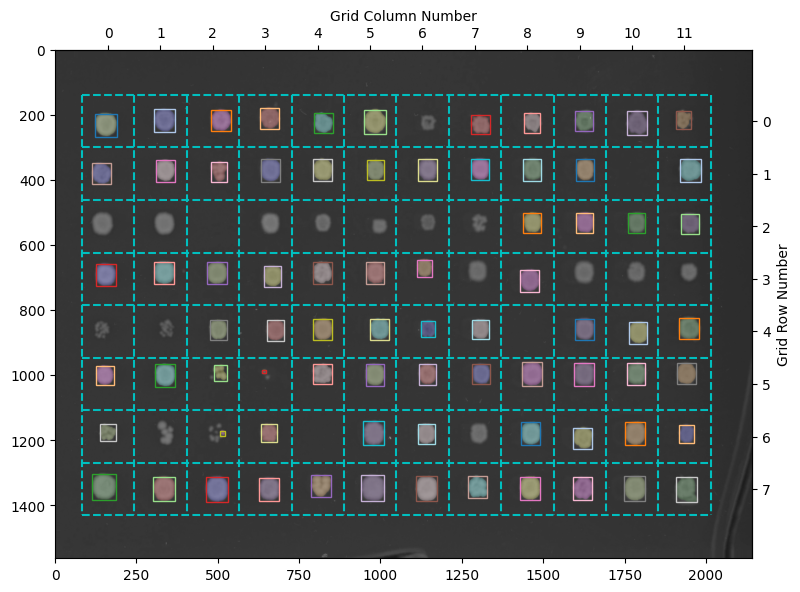

In [7]:
from phenotypic.prefab import HeavyWatershedPipeline

pipe = HeavyWatershedPipeline()
measurements = pipe.apply_and_measure(image, inplace=True)
print(measurements.head())
fig, ax = image.show_overlay()  # Returns a matplotlib.pyplot Figure & Axes

Here the objects with a colored overlay over them represent the different objects detected in your image. The boxes show the objects belonging to a specific grid section. The `HeavyWatershedPipeline` takes steps to ensure only one object in each section remains for downstream analysis. In reality, more objects were probably detected, but the refinement steps removed them according tos trict filters